In [13]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.applications import MobileNetV2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

preprocessing to image data

In [15]:


# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for validation
)

In [16]:

train_data = train_datagen.flow_from_directory(
   "D://data science//datasets//pet//images",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)


Found 5913 images belonging to 2 classes.


In [17]:
val_data = train_datagen.flow_from_directory(
   "D://data science//datasets//pet//images",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 1477 images belonging to 2 classes.


Use MobileNetV2 for feature extraction


In [18]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
print(base_model.output_shape)

(None, 7, 7, 1280)


In [19]:
def extract_features(generator, base_model):
    features = []
    labels = []
    for x_batch, y_batch in generator:
        batch_features = base_model.predict(x_batch)
        features.append(batch_features)
        labels.append(y_batch) 
        if len(features) >= len(generator):
            break
    print (f"{len(features)}      {len(generator)}")
    return np.vstack(features), np.vstack(labels)   # convert (features , labels) from list to narray

In [20]:
X_train, y_train = extract_features(train_data, base_model) # Extract features from the training data

X_val, y_val = extract_featuresy(val_data, base_model) # Extract features from the validation data

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 836ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 784ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 757ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 829ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 804ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 793ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 813ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 772ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 760ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 807ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 775ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 775ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 781ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 778ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 798ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
print(X_train.shape)
# print(x_val.shape)
# Flatten the features
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
# type(X_train)

(5913, 62720)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train.argmax(axis=1))

# Predict and evaluate
y_pred_lr = log_reg.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val.argmax(axis=1), y_pred_lr))
print(classification_report(y_val.argmax(axis=1), y_pred_lr))

Logistic Regression Accuracy: 0.962762356127285
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       476
           1       0.97      0.97      0.97      1001

    accuracy                           0.96      1477
   macro avg       0.96      0.96      0.96      1477
weighted avg       0.96      0.96      0.96      1477



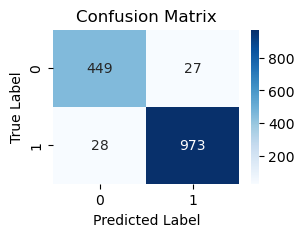

In [28]:
cm = confusion_matrix(y_val.argmax(axis=1), y_pred_lr)

plt.figure(figsize=(3,2))
sns.heatmap(cm,fmt = 'd',annot =True,cmap = 'Blues', xticklabels=range(2), yticklabels=range(2))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:

accuracy_score(y_val.argmax(axis=1), y_pred_lr)

0.962762356127285

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


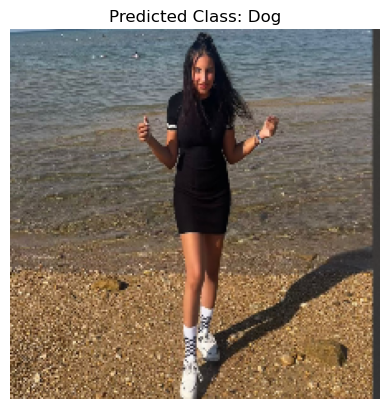

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1. Load and preprocess the image
img_path = r"D:\data science\datasets\pet\Screenshot 2024-12-16 153010.png" # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match the input size
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale if your model expects scaled input (e.g., from ImageDataGenerator)
# 2. Extract features using the base model
features = base_model.predict(img_array)  # Shape: (1, 7, 7, 1280)
features_flat = features.flatten().reshape(1, -1)  # Flatten and reshape for LogisticRegression

# 3. Predict the class using Logistic Regression
prediction = log_reg.predict(features_flat)  # Predict class index
class_index = prediction[0]  # Extract the predicted class

# 4. Map class index to class labels
class_labels = {0: 'Cat', 1: 'Dog'}  # Replace with your actual class labels
predicted_label = class_labels[class_index]

# 5. Display the result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Class: {predicted_label}")
plt.show()

In [1]:
from sklearn.metrics import classification_report
def apply_model(model):
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(classification_report(y_train,train_pred))
    print(classification_report(y_test, test_pred))